# Digit Classification
### MNIST Dataset

The first step is to load and visualize the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mnist_data.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [4]:
df.shape

(35000, 785)

## Preprocessing

### Missing Data
Check for null values

In [5]:
df.isnull().values.any()

False

### Formatting Data
Reformat data for labels and values

In [6]:
df.columns = [*df.columns[:-1], 'Target']
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize Each Element

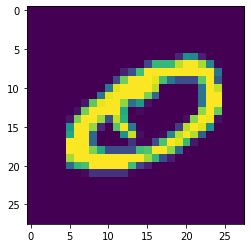

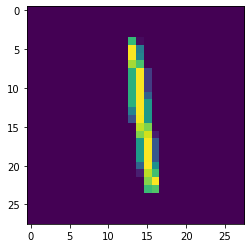

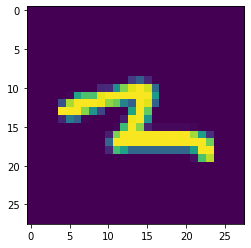

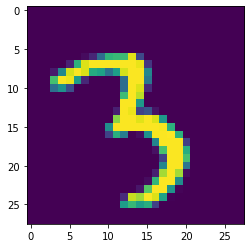

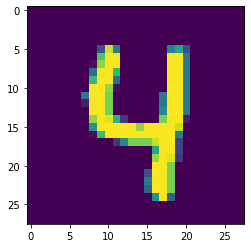

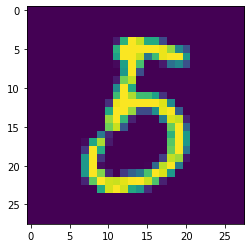

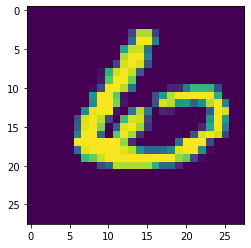

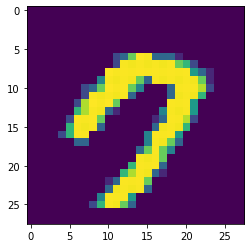

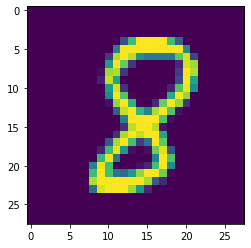

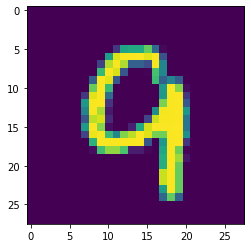

In [7]:
numbers = list(range(0,10))

for num in numbers:
    number_df = df[df['Target'] == num].iloc[0,:-1].to_numpy()
    number_df = number_df.reshape(28,28)
    fig = plt.figure()
    plt.imshow(number_df)
    plt.show()

## Visualize Mean of Each Element

In [8]:
mean_df = df.groupby(['Target']).mean()

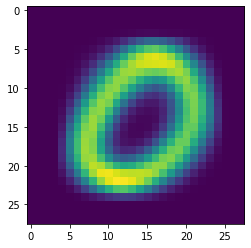

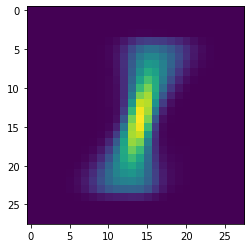

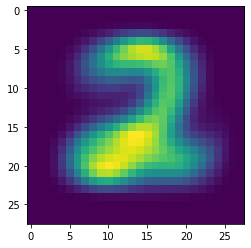

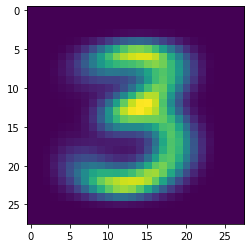

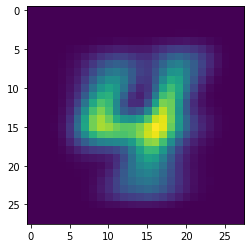

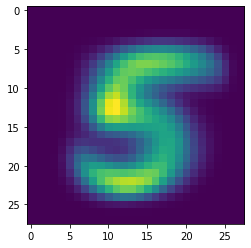

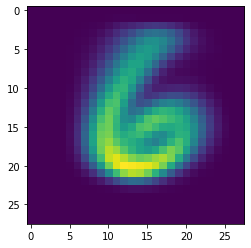

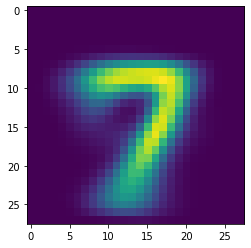

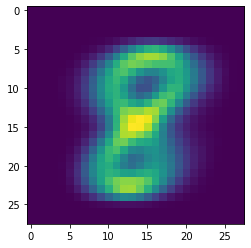

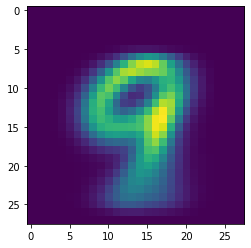

In [9]:
numbers = list(range(0,10))

for num in numbers:
    number_df = mean_df.iloc[num,:].to_numpy()
    number_df = number_df.reshape(28,28)
    fig = plt.figure()
    plt.imshow(number_df)
    plt.show()

# Classification Models
## Logistic Regression
The first step is to fit a logistic regression model to the dataset using the 'lbfgs' algorithm. Scaling of the data is omitted moving forward as each feature is on the same scale from 0 to 255.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

A train test split of 0.4 is selected. Default settings are kept in place to begin (max iterations of 100 and an l2 penalty with C=1.0) to run the base model.

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=1, stratify = y_test)

In [12]:
log_model = LogisticRegression(solver='lbfgs',penalty='l2',C=1.0,max_iter=100)
log_model.fit(X_train, y_train)
log_model.score(X_test,y_test)

0.9050714285714285

A testing score of 0.905 is achieved. Because the model has convergance warnings, a maximum iteration of 1000 is tested in order to determine the effects on the test score.

In [13]:
log_model = LogisticRegression(solver='lbfgs',penalty='l2',C=1.0,max_iter=1000)
log_model.fit(X_train, y_train)
log_model.score(X_test,y_test)

0.8919285714285714

Because the testing score does not increase with increased iterations, the default value of 100 iterations is maintained moving forward.

## Reduce Dimensionality with PCA

In [14]:
from sklearn.decomposition import PCA
import time

Dimensions were reduced from 1 to 784 and the resulting train/test scores and computational time was assessed.

In [15]:
time_results = []
train_score = []
test_score = []
dimensions = [1,5,10,50,100,250,500,784]

for d in dimensions:
    my_pca = PCA(n_components=d)
    my_pca = my_pca.fit(X_train)
    X_train_pca = my_pca.transform(X_train)
    X_test_pca = my_pca.transform(X_test)
    
    start = time.time()
    
    log_model = LogisticRegression(solver='lbfgs',penalty='l2',C=1.0,max_iter=100)
    log_model.fit(X_train_pca, y_train)
    train_score.append(log_model.score(X_train_pca,y_train))
    test_score.append(log_model.score(X_test_pca,y_test))
    
    end = time.time()
    
    avg_time = end-start
    time_results.append(avg_time)

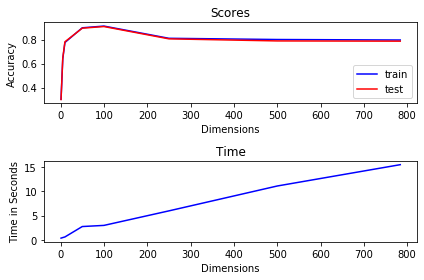

In [16]:
plt.subplot(211)
plt.plot(dimensions, train_score,label='train',c='blue')
plt.plot(dimensions, test_score,label='test',c='red')
plt.title('Scores')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(dimensions, time_results,c='blue')
plt.title('Time')
plt.xlabel('Dimensions')
plt.ylabel('Time in Seconds')

plt.tight_layout()

plt.show()

As shown in the plot, comptational time increases (somewhat linearly) as the dimensions increase. This is an important consideration to take into account for large datasets.

#### Dimensionality Reduction:

**Advantage:** Reduced computational time

**Disdvantage:** Reduced interpretability of results, and too few dimensions drastically reduces model accuracy

## Reduce Number of Data Points

Data Size was reduced from 1% to 100% and the resulting train/test scores and computational time was assessed.

Data was split using an intial train_test_split and stratifying by y to ensure an accurate distribution of data.

In [17]:
time_results = []
train_score = []
test_score = []
data_size = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]

for d in data_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=d, random_state=1, stratify = y)
    X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=1, stratify = y_test)
    
    start = time.time()
    
    log_model = LogisticRegression(solver='lbfgs',penalty='l2',C=1.0,max_iter=100)
    log_model.fit(X_train, y_train)
    train_score.append(log_model.score(X_train,y_train))
    test_score.append(log_model.score(X_test,y_test))
    
    end = time.time()
    
    avg_time = end-start
    time_results.append(avg_time)

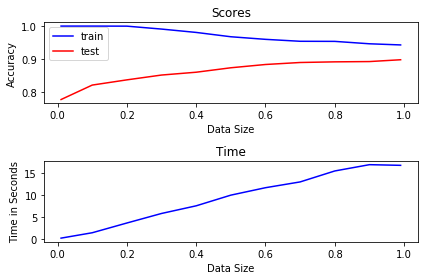

In [18]:
plt.subplot(211)
plt.plot(data_size, train_score,label='train',c='blue')
plt.plot(data_size, test_score,label='test',c='red')
plt.title('Scores')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(data_size, time_results,c='blue')
plt.title('Time')
plt.xlabel('Data Size')
plt.ylabel('Time in Seconds')

plt.tight_layout()

plt.show()

As shown in the plot, comptational time increases (somewhat linearly) as the datasize increases. This is an important consideration to take into account for large datasets.

#### Data Size Reduction:

**Advantage:** Reduced computational time

**Disdvantage:** Reduced testing accuracy

## KNN Classifiers

The preliminary KNN Classifier mode is fit to 1% of the data in order to determine which n_neighbors should be further tested.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=1, stratify = y_test)

An n_neighbors=1 and n_neighbors=number of training points was tested on this subset to see the results.

In [21]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train, y_train)
print(KNN_model.score(X_train,y_train))
print(KNN_model.score(X_test,y_test))

1.0
0.7857142857142857


In [22]:
KNN_model = KNeighborsClassifier(n_neighbors=y_train.shape[0])
KNN_model.fit(X_train, y_train)
print(KNN_model.score(X_train,y_train))
print(KNN_model.score(X_test,y_test))

0.10952380952380952
0.11428571428571428


As shown in the results above, the n_neighbors of 1 is overfitting the training set and therefore resulting in a train score of 1 and a much lower test scoer of 0.78.

In contrast, n_neighbors of 784 is drastically underfitting both the train and test set resulting in much lower scores of 0.109 and 0.114, respectively.

In this case, the n_neighbors of 1 is the better model.


Next, various k's are tested on the 1% of data to determine the best k value.

In [23]:
acc_train = []
acc_test = []
n_neighbors = list(range(1,y_train.shape[0]))

for k in n_neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    acc_train.append(model_knn.score(X_train, y_train))
    acc_test.append(model_knn.score(X_test, y_test))
    
results_KNN = pd.DataFrame({'k': n_neighbors,
              'Training Accuracy': acc_train,
              'Test Accuracy': acc_test})
results_KNN.head()

,k,Training Accuracy,Test Accuracy
0,1,1.000000,0.785714
1,2,0.871429,0.764286
2,3,0.866667,0.764286
3,4,0.809524,0.771429
4,5,0.814286,0.771429


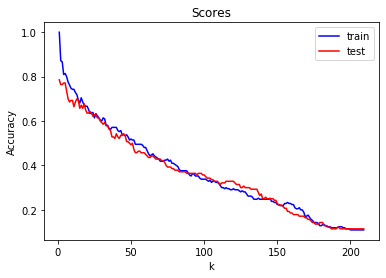

In [24]:
plt.figure()
plt.plot(n_neighbors, acc_train,label='train',c='blue')
plt.plot(n_neighbors, acc_test,label='test',c='red')
plt.title('Scores')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As shown in the plot, the highest train and test accuracy are achieved at k=1. Clearly the model performs better at lower k values.

Next, a few select values are tested on the full data set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify = y)

In [26]:
acc_train = []
acc_test = []
n_neighbors = [1,5,10,20,100,y_train.shape[0]]
n_neighbors

[1, 5, 10, 20, 100, 21000]

**The following cell takes a long time to run. Uncomment to run**

In [27]:
for k in n_neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    acc_train.append(model_knn.score(X_train, y_train))
    acc_test.append(model_knn.score(X_test, y_test))
    print(k)
    
results_KNN = pd.DataFrame({'k': n_neighbors,
              'Training Accuracy': acc_train,
              'Test Accuracy': acc_test})
results_KNN

1
5
10
20
100
21000


,k,Training Accuracy,Test Accuracy
0,1,1.000000,0.963357
1,5,0.971429,0.962286
2,10,0.961810,0.958357
3,20,0.952476,0.950143
4,100,0.918238,0.919929
5,21000,0.110381,0.110357


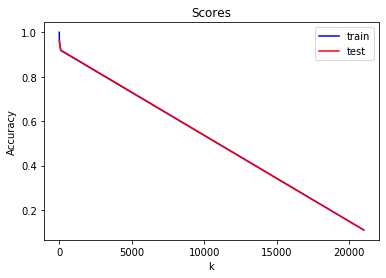

In [28]:
plt.figure()
plt.plot(n_neighbors, acc_train,label='train',c='blue')
plt.plot(n_neighbors, acc_test,label='test',c='red')
plt.title('Scores')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From this analysis, the optimal k value for this dataset is 1, as it results in the highest train and testing scores.

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify = y)

A decision tree is then fit to determine the optimal depth of the tree.

**The following cell also takes some time to run. Uncomment to run**

In [31]:
'''acc_train = []
acc_test = []
depth = list(range(1,50))

for n in depth:
    DT_model = DecisionTreeClassifier(max_depth=n)
    DT_model.fit(X_train, y_train)
    acc_train.append(DT_model.score(X_train, y_train))
    acc_test.append(DT_model.score(X_test, y_test))
    
results_DT = pd.DataFrame({'depth': depth,
              'Training Accuracy': acc_train,
              'Test Accuracy': acc_test})
results_DT.head()#'''

,depth,Training Accuracy,Test Accuracy
0,1,0.199857,0.197214
1,2,0.345714,0.344000
2,3,0.497286,0.488000
3,4,0.589952,0.576643
4,5,0.682238,0.666929


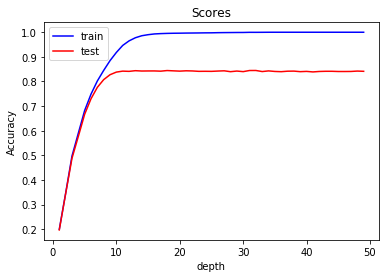

In [32]:
plt.figure()
plt.plot(depth, acc_train,label='train',c='blue')
plt.plot(depth, acc_test,label='test',c='red')
plt.title('Scores')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the plot it appears that a max_depth of 10 is optimal for the decision tree model.

# Cross Validation
## Logistic Regression Cross Validation

5-fold cross validation is used to determine the optimal penalty and C value for the logistic regression model.

A representative sample of the data (5%) is selected to determine the best model.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1, stratify = y)
X_remainder, X_test, y_remainder, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=1, stratify = y_test)

In [35]:
l1_cross_validation_scores = []

C_range = np.array([.0000001,.000001,.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000,10000000,100000000])

for c in C_range:
    LR_model = LogisticRegression(C=c,penalty='l1',random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
    l1_cross_validation_scores.append(cv_score)

In [36]:
l2_cross_validation_scores = []

C_range = np.array([.0000001,.000001,.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000,10000000,100000000])

for c in C_range:
    LR_model = LogisticRegression(C=c,penalty='l2',random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
    l2_cross_validation_scores.append(cv_score)

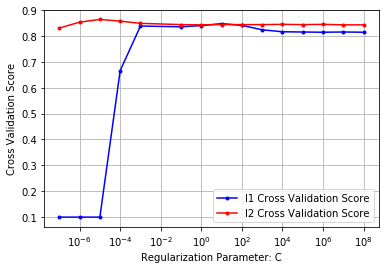

In [37]:
plt.figure()
plt.plot(C_range, l1_cross_validation_scores,label="l1 Cross Validation Score",marker='.',c='blue')
plt.plot(C_range, l2_cross_validation_scores,label="l2 Cross Validation Score",marker='.',c='red')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

The best model has C=10-5 with an l2 penalty. This will be fit on the full dataset.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1, stratify = y)

In [39]:
log_model = LogisticRegression(C=.00001,penalty='l2',random_state=1)
log_model.fit(X_train, y_train)
print(log_model.score(X_train,y_train))
print(log_model.score(X_test,y_test))

0.9288571428571428
0.9122142857142858


## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(X_test)

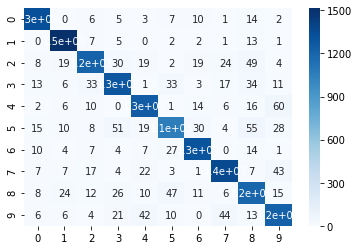

In [41]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),cmap="Blues",annot=True)

According to the confusion matrix, the model is strongest with 0s and 1s as they are often classified correctly.

Weaknesses include misclassifying numbers as 8s and 9s. Specifically, 2s and 5s are often misclassified as 8s, and the model performs the worst with misclassifying 4s as 9s.

## Class 4 vs 9

A new dataframe is made to distinguish class 4 and 9 numbers.

In [42]:
new_df = df[(df['Target'] == 4) | (df['Target'] == 9)]
new_df.shape

(6860, 785)

In [43]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

The best model from the logistic regression cross validation testing above is used to fit the data.

In [45]:
log_model = LogisticRegression(C=.00001,penalty='l2',random_state=1)
log_model.fit(X_train, y_train)
print(log_model.score(X_train,y_train))
print(log_model.score(X_test,y_test))

0.9820213799805636
0.9646501457725948


The model appears to do a good job of distinguishing between the two numbers, with a training score of 0.965. 

The coefficients of the model are plotted in order to determine which areas contribute the most to the model's determination of the number.

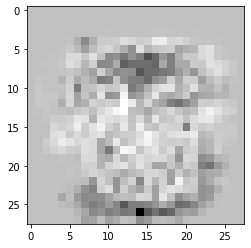

In [46]:
fig = plt.figure()
plt.imshow(log_model.coef_.reshape(28,28),cmap="Greys")
plt.show()

The darker areas are the most important in how the model decides between the two classes.

The top bottom loop of the 9 appears to play the biggest role, as these areas would not generally exist in a 4.